In [ ]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv("sample_clinical_notes.csv")

# 1. Check for Missing Values
print("Missing values per column:\n", df.isnull().sum())
df = df.dropna(subset=['note_text'])  # drop rows with missing note_text

# 2. Preprocess Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    return text

df['clean_text'] = df['note_text'].apply(clean_text)
# 3. Outlier Detection on Note Length
df['note_length'] = df['clean_text'].apply(lambda x: len(x.split()))
print("\nNote length stats:")
print(df['note_length'].describe())

# Simple outlier marking (if any were present)
q1 = df['note_length'].quantile(0.25)
q3 = df['note_length'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df['is_outlier'] = df['note_length'].apply(lambda x: x < lower or x > upper)

# 4. Feature: Count of Symptom Mentions (very basic keyword match)
symptom_keywords = ['cough', 'fatigue', 'pain', 'breath', 'nausea', 'headache']
df['symptom_count'] = df['clean_text'].apply(lambda x: sum([1 for word in x.split() if word in symptom_keywords]))
₹
# 5. Save Preprocessed Data
df.to_csv("preprocessed_notes_with_features.csv", index=False)

print("\nPreprocessing and feature extraction complete.")
print(df[['note_id', 'note_length', 'is_outlier', 'symptom_count']])



Missing values per column:
 note_id       0
patient_id    0
note_text     0
dtype: int64

Note length stats:
count     3.0
mean      9.0
std       2.0
min       7.0
25%       8.0
50%       9.0
75%      10.0
max      11.0
Name: note_length, dtype: float64

Preprocessing and feature extraction complete.
   note_id  note_length  is_outlier  symptom_count
0        1           11       False              3
1        2            9       False              1
2        3            7       False              2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


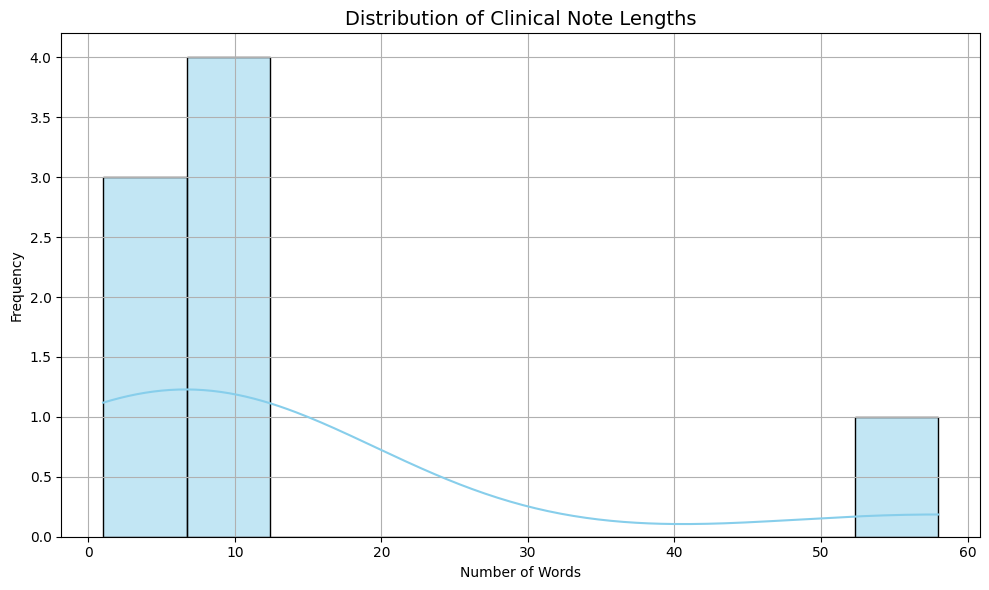

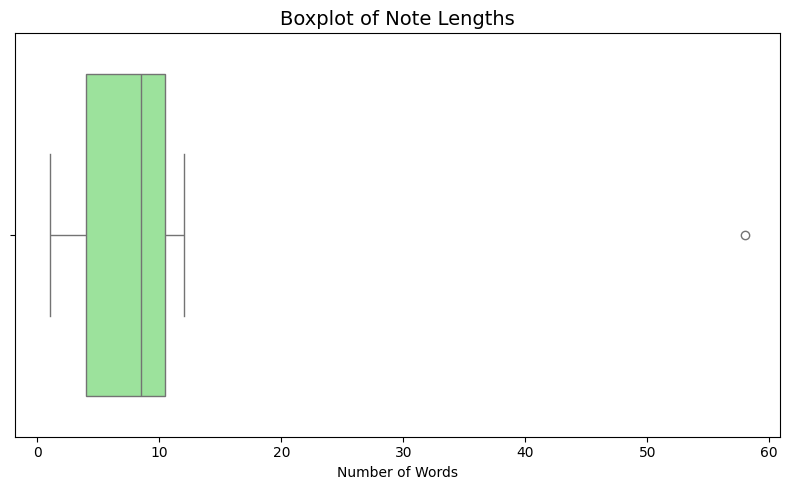

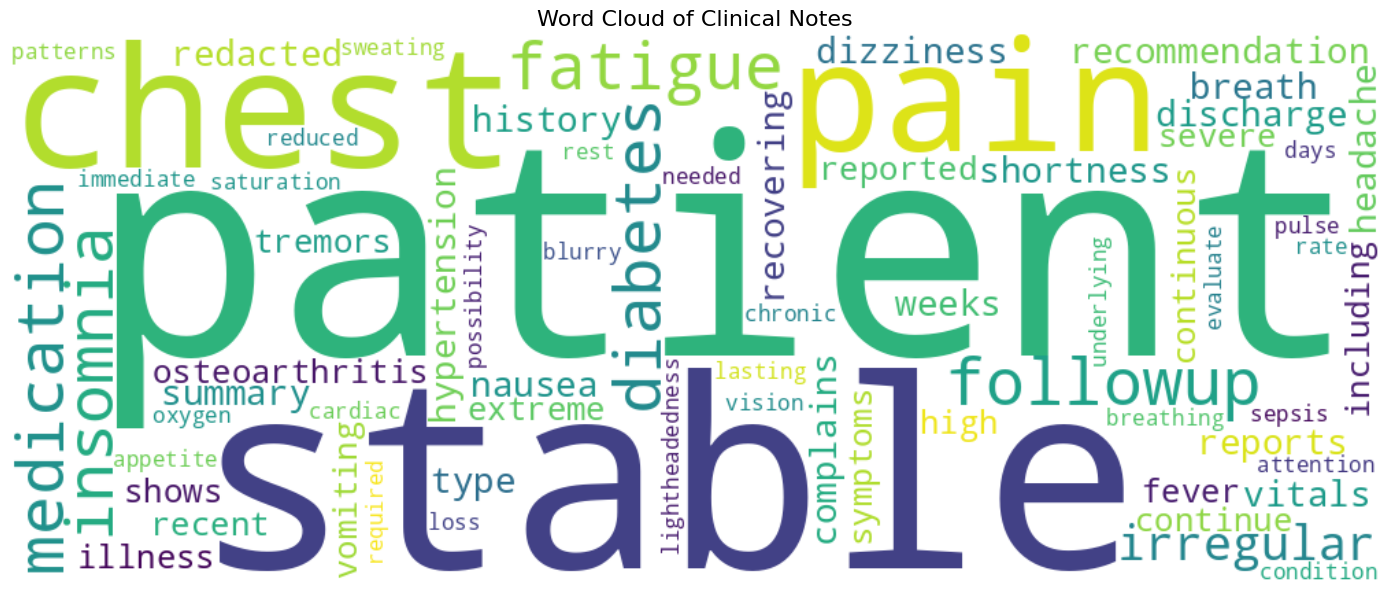

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-4-48289119.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Word', x='Frequency', data=freq_df, palette='rocket')


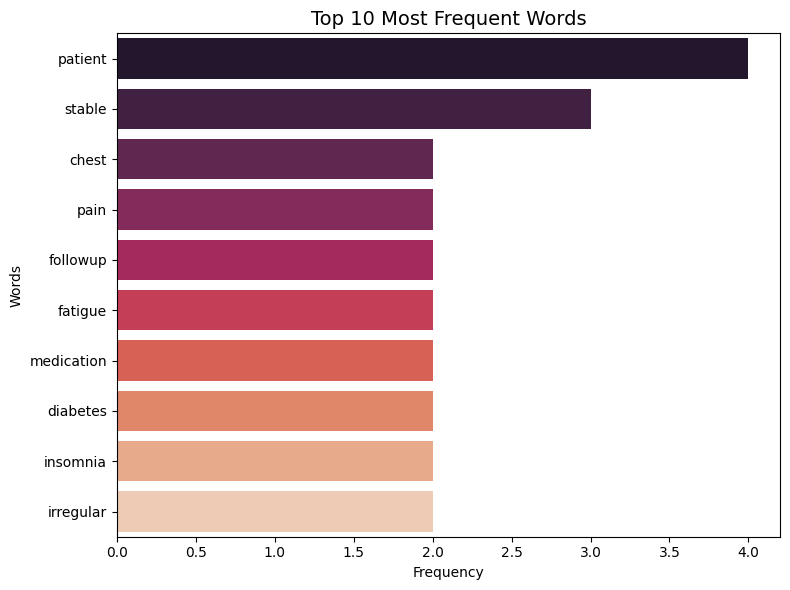

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import string
import re

# Load dataset
df = pd.read_csv("sample_realistic_clinical_notes.csv")

# Drop nulls and blank notes for EDA
df = df.dropna(subset=['note_text'])
df = df[df['note_text'].str.strip() != ""]

# Clean text for EDA visuals
def basic_clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['note_text'].apply(basic_clean)
df['note_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# ----------- Plot 1: Distribution of Note Lengths --------------
plt.figure(figsize=(10, 6))
sns.histplot(df['note_length'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Clinical Note Lengths", fontsize=14)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- Plot 2: Boxplot for Outlier Detection --------------
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['note_length'], color='lightgreen')
plt.title("Boxplot of Note Lengths", fontsize=14)
plt.xlabel("Number of Words")
plt.tight_layout()
plt.show()

# ----------- Plot 3: Word Cloud --------------
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Clinical Notes", fontsize=16)
plt.tight_layout()
plt.show()

# ----------- Plot 4: Most Frequent Words Bar Plot --------------
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_tokens = [word for text in df['clean_text'] for word in text.split() if word not in stop_words and len(word) > 2]
word_freq = Counter(all_tokens).most_common(10)
freq_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

plt.figure(figsize=(8, 6))
sns.barplot(y='Word', x='Frequency', data=freq_df, palette='rocket')
plt.title("Top 10 Most Frequent Words", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


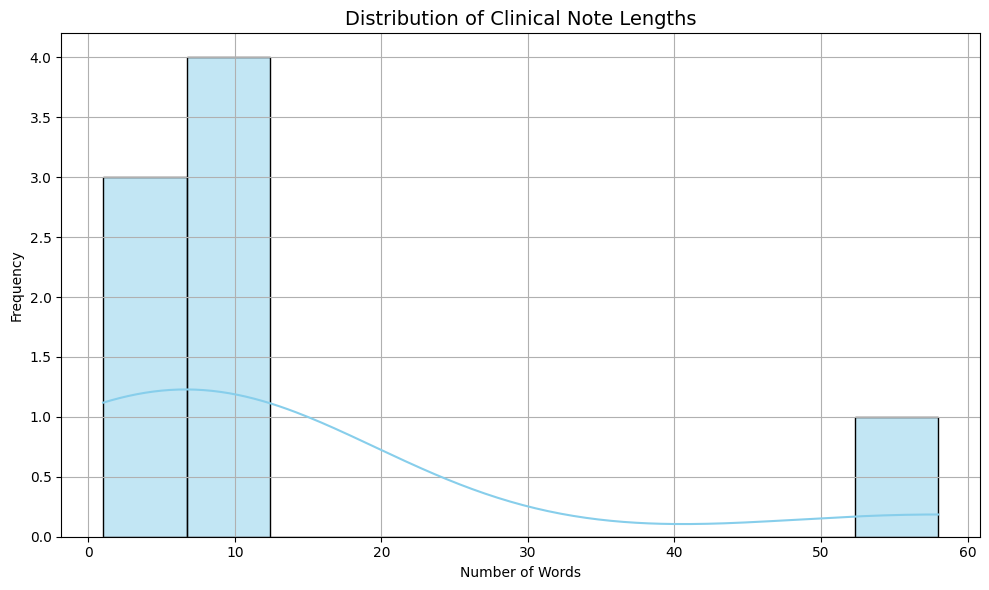

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['note_length'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Clinical Note Lengths", fontsize=14)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

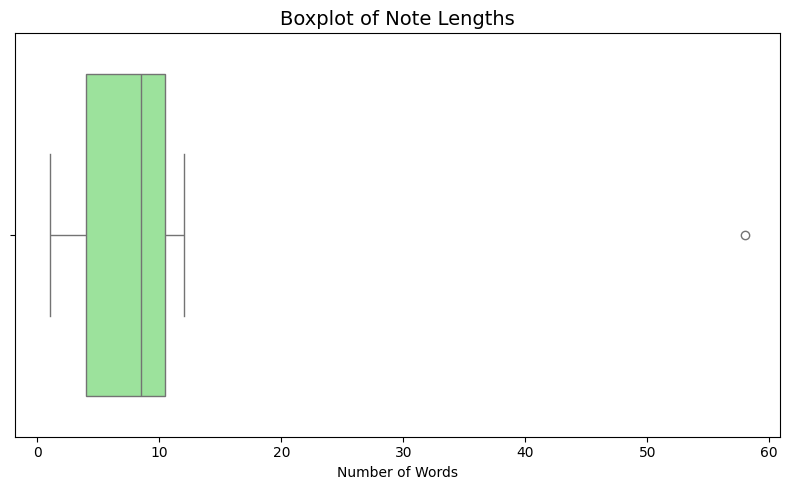

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['note_length'], color='lightgreen')
plt.title("Boxplot of Note Lengths", fontsize=14)
plt.xlabel("Number of Words")
plt.tight_layout()
plt.show()

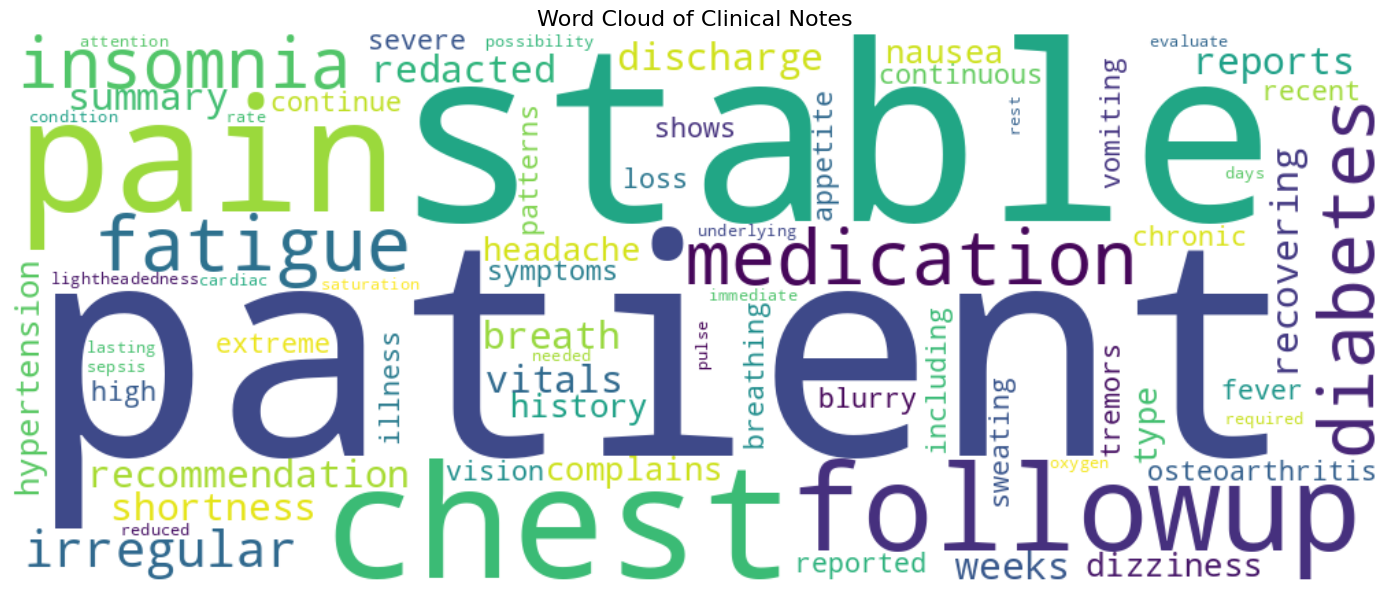

In [ ]:
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Clinical Notes", fontsize=16)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-9-2377582603.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Word', x='Frequency', data=freq_df, palette='rocket')


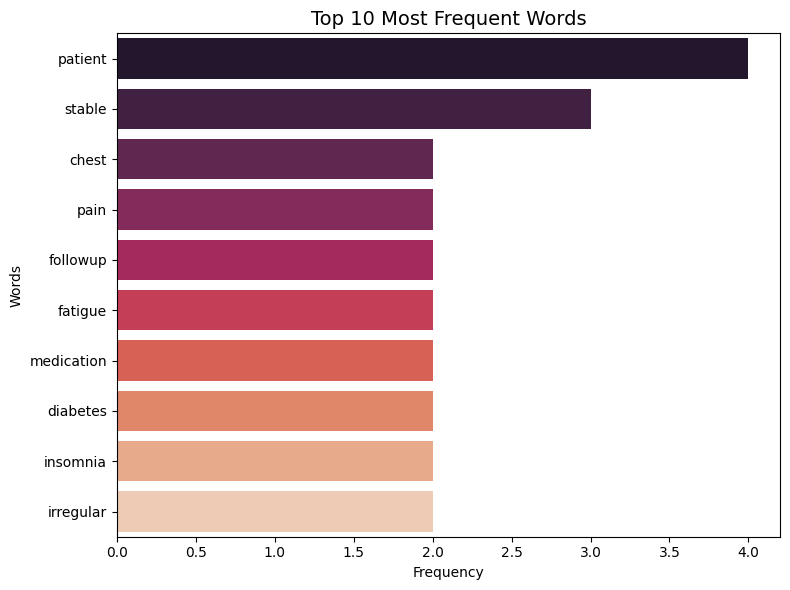

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_tokens = [word for text in df['clean_text'] for word in text.split() if word not in stop_words and len(word) > 2]
word_freq = Counter(all_tokens).most_common(10)
freq_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

plt.figure(figsize=(8, 6))
sns.barplot(y='Word', x='Frequency', data=freq_df, palette='rocket')
plt.title("Top 10 Most Frequent Words", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-900471805.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


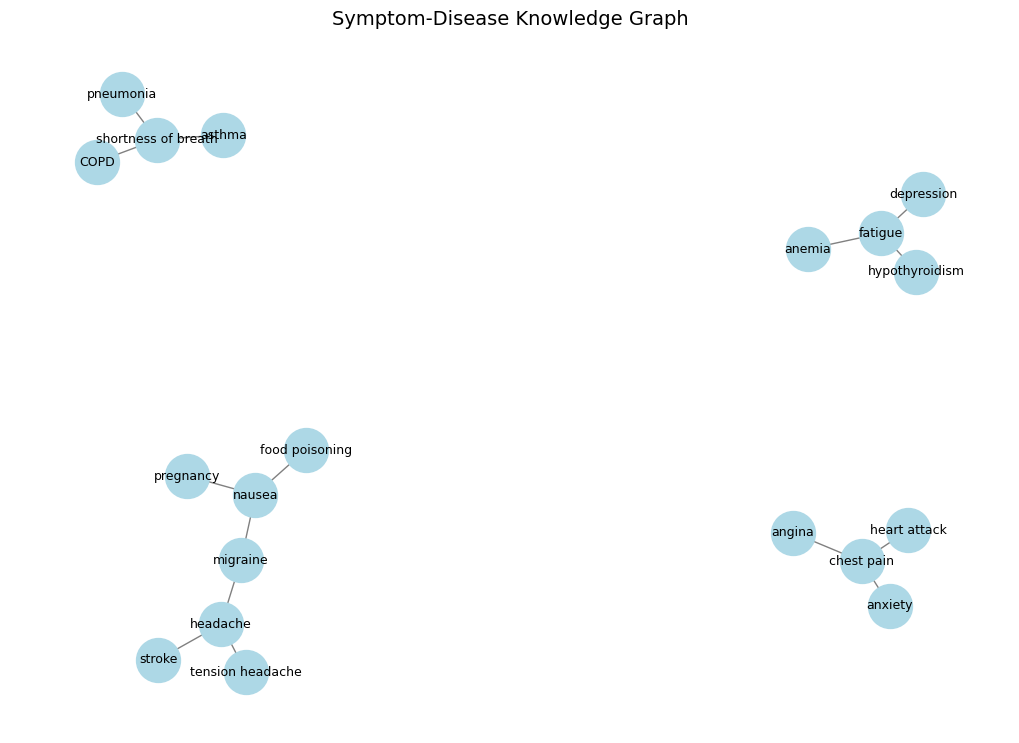


--- FUSION OUTPUT ---

   note_id                                          note_text  \
0        1  Patient reports chest pain and shortness of br...   
1        2             Fatigue and headache after medication.   
2        3                  Severe nausea and vomiting noted.   
3        4                              No symptoms reported.   
4        5  Patient has chest pain and fatigue, suggest te...   

                            symptoms                        predicted_diseases  
0  [chest pain, shortness of breath]           [COPD, pneumonia, heart attack]  
1                [headache, fatigue]  [depression, migraine, tension headache]  
2                           [nausea]     [food poisoning, migraine, pregnancy]  
3                                 []                                        []  
4              [chest pain, fatigue]        [heart attack, depression, angina]  


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# --------- Step 2: Build Knowledge Graph ---------
G = nx.Graph()

# Add edges from symptoms to diseases
for _, row in symcat.iterrows():
    symptom = row['symptom']
    for disease in row['possible_diseases'].split(','):
        G.add_edge(symptom, disease.strip())

# --------- Step 3: Visualize the Graph ---------
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=9)
plt.title("Symptom-Disease Knowledge Graph", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# --------- Step 4: Extract Symptoms & Predict Diseases ---------
symptoms_set = set(symcat['symptom'].str.lower())

def extract_symptoms(text):
    return [sym for sym in symptoms_set if sym in text.lower()]

def predict_diseases(symptoms):
    diseases = set()
    for sym in symptoms:
        matches = symcat[symcat['symptom'].str.lower() == sym]['possible_diseases']
        for m in matches:
            diseases.update([d.strip() for d in m.split(',')])
    return list(diseases)[:3]

notes['symptoms'] = notes['note_text'].apply(extract_symptoms)
notes['predicted_diseases'] = notes['symptoms'].apply(predict_diseases)

# --------- Step 5: Display and Screenshot ---------
print("\n--- FUSION OUTPUT ---\n")
print(notes[['note_id', 'note_text', 'symptoms', 'predicted_diseases']])


In [ ]:
# Simulated list of symptom terms (from SymCat)
symptom_keywords = ['chest pain', 'shortness of breath', 'fatigue', 'nausea', 'headache']

# Extract symptoms using keyword match
def extract_symptoms(text):
    return [sym for sym in symptom_keywords if sym in text]

df['extracted_symptoms'] = df['clean_text'].apply(extract_symptoms)

# Display output for screenshot
print("\n✅ Stage 2: Extracted Symptoms\n")
print(df[['note_id', 'clean_text', 'extracted_symptoms']])



✅ Stage 2: Extracted Symptoms

   note_id                                         clean_text  \
0        1  patient reports chest pain and shortness of br...   
3        4                                          redacted    
4        5  discharge summary stable vitals patient recove...   
5        6                                             stable   
6        7  complains of fatigue nausea dizziness and head...   
7        8  hypertension type  diabetes osteoarthritis ins...   
8        9              patient is stable continue medication   
9       10  patient shows extreme symptoms including vomit...   

                  extracted_symptoms  
0  [chest pain, shortness of breath]  
3                                 []  
4                                 []  
5                                 []  
6        [fatigue, nausea, headache]  
7                                 []  
8                                 []  
9                          [fatigue]  


/tmp/ipython-input-12-159764145.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


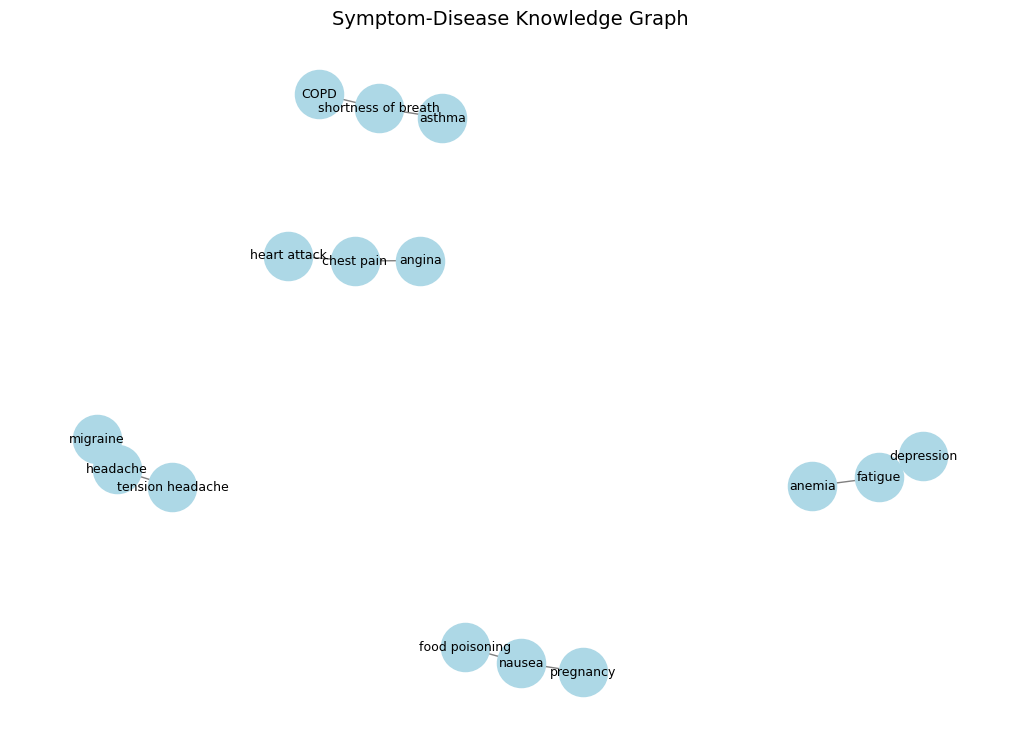


✅ Stage 3: Predicted Diseases

   note_id                 extracted_symptoms  \
0        1  [chest pain, shortness of breath]   
3        4                                 []   
4        5                                 []   
5        6                                 []   
6        7        [fatigue, nausea, headache]   
7        8                                 []   
8        9                                 []   
9       10                          [fatigue]   

                       predicted_diseases  
0            [COPD, heart attack, asthma]  
3                                      []  
4                                      []  
5                                      []  
6  [depression, food poisoning, migraine]  
7                                      []  
8                                      []  
9                    [anemia, depression]  


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Simulated symptom-to-disease mapping
symptom_disease_map = {
    'chest pain': ['angina', 'heart attack'],
    'shortness of breath': ['asthma', 'COPD'],
    'fatigue': ['anemia', 'depression'],
    'nausea': ['pregnancy', 'food poisoning'],
    'headache': ['migraine', 'tension headache']
}

# Create knowledge graph
G = nx.Graph()
for symptom, diseases in symptom_disease_map.items():
    for disease in diseases:
        G.add_edge(symptom, disease)

# Visualize KG
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=9)
plt.title("Symptom-Disease Knowledge Graph", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# Query KG to predict diseases
def predict_diseases(symptoms):
    diseases = set()
    for sym in symptoms:
        diseases.update(symptom_disease_map.get(sym, []))
    return list(diseases)[:3]

df['predicted_diseases'] = df['extracted_symptoms'].apply(predict_diseases)

# Display output for screenshot
print("\n✅ Stage 3: Predicted Diseases\n")
print(df[['note_id', 'extracted_symptoms', 'predicted_diseases']])


In [ ]:
import pandas as pd
import re
from IPython.display import display, HTML

# Sample clinical notes (expanded for realism)
df = pd.DataFrame({
    'note_id': range(1, 8),
    'note_text': [
        "Patient reports chest pain and shortness of breath during physical activity.",
        "Complains of fatigue, nausea, and headache after taking new medication.",
        "Headache and dizziness experienced for the last 3 days.",
        "Severe nausea and vomiting noted, might be food poisoning.",
        "Patient stable. No symptoms currently.",
        "Reports fatigue, lack of appetite, and weakness.",
        "Chest pain worsens while climbing stairs. Shortness of breath noted."
    ]
})

# Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\*+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df['clean_text'] = df['note_text'].apply(clean_text)

# Symptom list (more comprehensive)
symptom_keywords = [
    'chest pain', 'shortness of breath', 'fatigue', 'nausea', 'headache',
    'dizziness', 'vomiting', 'lack of appetite', 'weakness'
]

# Extract symptoms
def extract_symptoms(text):
    return [sym for sym in symptom_keywords if sym in text]

df['extracted_symptoms'] = df['clean_text'].apply(extract_symptoms)

# NER-style Visualization
def highlight_symptoms(text, symptoms):
    highlighted = text
    for sym in symptoms:
        highlighted = re.sub(sym, f'<span style="background-color: #ffff99">{sym}</span>', highlighted)
    return highlighted

df['highlighted'] = df.apply(lambda x: highlight_symptoms(x['clean_text'], x['extracted_symptoms']), axis=1)

# Display NER table for screenshots
print("NER Table with Highlighted Symptoms")

html_rows = ""
for _, row in df.iterrows():
    html_rows += f"""
        <tr>
            <td>{row['note_id']}</td>
            <td>{row['highlighted']}</td>
            <td>{', '.join(row['extracted_symptoms']) if row['extracted_symptoms'] else 'None'}</td>
        </tr>
    """

html_table = f"""
    <style>
        table {{ border-collapse: collapse; width: 100%; }}
        th, td {{ border: 1px solid #dddddd; text-align: left; padding: 8px; }}
        th {{ background-color: #f2f2f2; }}
    </style>
    <table>
        <tr><th>Note ID</th><th>Clinical Note</th><th>Extracted Symptoms</th></tr>
        {html_rows}
    </table>
"""

display(HTML(html_table))


NER Table with Highlighted Symptoms


Note ID,Clinical Note,Extracted Symptoms
1,patient reports chest pain and shortness of breath during physical activity,"chest pain, shortness of breath"
2,complains of fatigue nausea and headache after taking new medication,"fatigue, nausea, headache"
3,headache and dizziness experienced for the last 3 days,"headache, dizziness"
4,severe nausea and vomiting noted might be food poisoning,"nausea, vomiting"
5,patient stable no symptoms currently,None
6,reports fatigue lack of appetite and weakness,"fatigue, lack of appetite, weakness"
7,chest pain worsens while climbing stairs shortness of breath noted,"chest pain, shortness of breath"


In [ ]:
# --- STEP 4: Predict Diseases by Querying the KG ---
def predict_diseases(symptoms):
    diseases = set()
    for sym in symptoms:
        matched = symptom_disease_map.get(sym, [])
        diseases.update(matched)
    return list(diseases)[:3]  # top-3

df['predicted_diseases'] = df['extracted_symptoms'].apply(predict_diseases)

# --- STEP 5: Show Final Table for Screenshot ---
print("✅ Final Fusion Output Table:\n")
print(df[['note_id', 'clean_text', 'extracted_symptoms', 'predicted_diseases']])


✅ Final Fusion Output Table:

   note_id                                         clean_text  \
0        1  patient reports chest pain and shortness of br...   
1        2  complains of fatigue nausea and headache after...   
2        3  headache and dizziness experienced for the las...   
3        4  severe nausea and vomiting noted might be food...   
4        5               patient stable no symptoms currently   
5        6      reports fatigue lack of appetite and weakness   
6        7  chest pain worsens while climbing stairs short...   

                      extracted_symptoms  \
0      [chest pain, shortness of breath]   
1            [fatigue, nausea, headache]   
2                  [headache, dizziness]   
3                     [nausea, vomiting]   
4                                     []   
5  [fatigue, lack of appetite, weakness]   
6      [chest pain, shortness of breath]   

                             predicted_diseases  
0                  [COPD, heart attack, asthma

In [ ]:
# ------------------------------------------
# STEP 4: Predict Diseases by Querying the KG
# ------------------------------------------

# Define a function to predict diseases from extracted symptoms
def predict_diseases(symptom_list):
    disease_set = set()  # use a set to avoid duplicates

    for symptom in symptom_list:
        # Get diseases related to this symptom from the knowledge graph
        related_diseases = symptom_disease_map.get(symptom, [])
        disease_set.update(related_diseases)

    # Return only the top-3 diseases (can be adjusted)
    return list(disease_set)[:3]

# Apply the prediction function to each note's extracted symptoms
df['predicted_diseases'] = df['extracted_symptoms'].apply(predict_diseases)


In [ ]:
# Display the final results table for each note
print("✅ Final Fusion Output Table:\n")

# Show note ID, cleaned text, extracted symptoms, and predicted diseases
print(df[['note_id', 'clean_text', 'extracted_symptoms', 'predicted_diseases']])


✅ Final Fusion Output Table:

   note_id                                         clean_text  \
0        1  patient reports chest pain and shortness of br...   
1        2  complains of fatigue nausea and headache after...   
2        3  headache and dizziness experienced for the las...   
3        4  severe nausea and vomiting noted might be food...   
4        5               patient stable no symptoms currently   
5        6      reports fatigue lack of appetite and weakness   
6        7  chest pain worsens while climbing stairs short...   

                      extracted_symptoms  \
0      [chest pain, shortness of breath]   
1            [fatigue, nausea, headache]   
2                  [headache, dizziness]   
3                     [nausea, vomiting]   
4                                     []   
5  [fatigue, lack of appetite, weakness]   
6      [chest pain, shortness of breath]   

                             predicted_diseases  
0                  [COPD, heart attack, asthma